<a href="https://colab.research.google.com/github/egorik3z/ML/blob/master/ML23_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# **Анализ и предобработка**

In [2]:
from sklearn.datasets import load_iris

iris_data = load_iris()

In [3]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [5]:
feature_names = iris_data['feature_names']
df = pd.DataFrame(iris_data['data'], columns=feature_names)
species_names = iris_data['target_names']
target_idxs = iris_data['target']
df['species'] = species_names[target_idxs]

In [6]:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [9]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

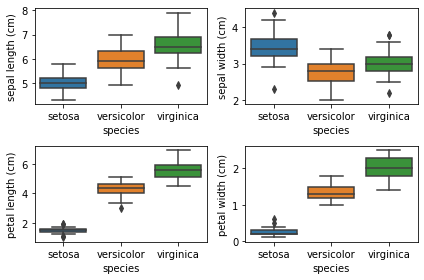

In [10]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.boxplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

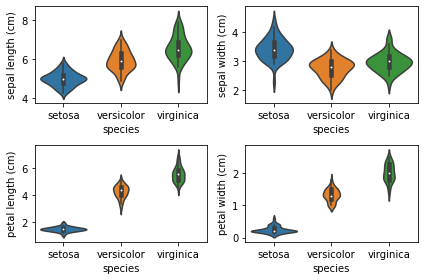

In [11]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.violinplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

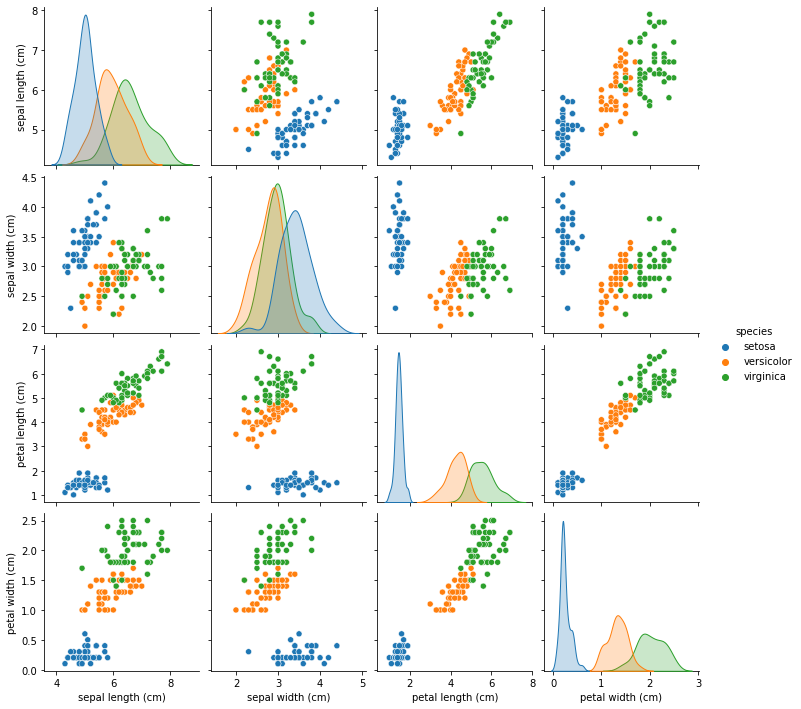

In [12]:
sns.pairplot(df, hue='species')

# **Разработка модели**

In [13]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.7

X = df[feature_names]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


In [14]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:

sample = X_test.iloc[0]

prediction = logreg.predict([sample])
predict_proba = logreg.predict_proba([sample])
predict_log_proba = logreg.predict_log_proba([sample])

print(f'  Sample:\n{sample}')
print(f'  Prediction proba:\n{predict_proba[0]}')
print(f'  Prediction proba sum:\n{sum(predict_proba[0])}')
print(f'  Prediction log proba:\n{predict_log_proba[0]}')
print(f'  Prediction:\n{prediction}')
print(f'  Prediction name:\n{species_names[prediction]}')

  Sample:
sepal length (cm)    7.3
sepal width (cm)     2.9
petal length (cm)    6.3
petal width (cm)     1.8
Name: 107, dtype: float64
  Prediction proba:
[1.99456039e-06 3.30315377e-02 9.66966468e-01]
  Prediction proba sum:
1.0
  Prediction log proba:
[-13.12508689  -3.41029249  -0.03359146]
  Prediction:
[2]
  Prediction name:
['virginica']


In [16]:
X_test.shape[0]

45

In [17]:
print(f'  Classes: {logreg.classes_}')
print(f'  Weights:\n{logreg.coef_}')
print(f'  Bias:\n{logreg.intercept_}')

  Classes: [0 1 2]
  Weights:
[[-0.53386701  0.76928293 -2.22497221 -0.97108869]
 [ 0.41969751 -0.43035179 -0.09734326 -0.84011279]
 [ 0.11416951 -0.33893114  2.32231548  1.81120148]]
  Bias:
[  9.82949668   2.42239176 -12.25188844]


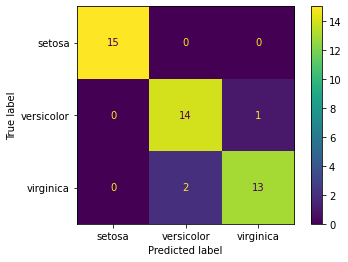

In [18]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)

In [19]:

from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# **Кросс-валидация**

In [ ]:
from sklearn.model_selection import cross_val_score

X = df[feature_names]
y = target_idxs

# Данная функция используется только для оценки 
#   (она обучает модель внутри, но не возвращает ее)
scores = cross_val_score(
    logreg,     # Модель для оценки
    X,          # Данные для обучения
    y,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [0.96658312 1.         0.93265993 0.96658312 1.        ]
F1 (macro):  0.97 (+/-  0.05)


# **Задание**

Разберитесь и отобразите ROC-кривую с помощью sklearn.metrics.roc_curve;

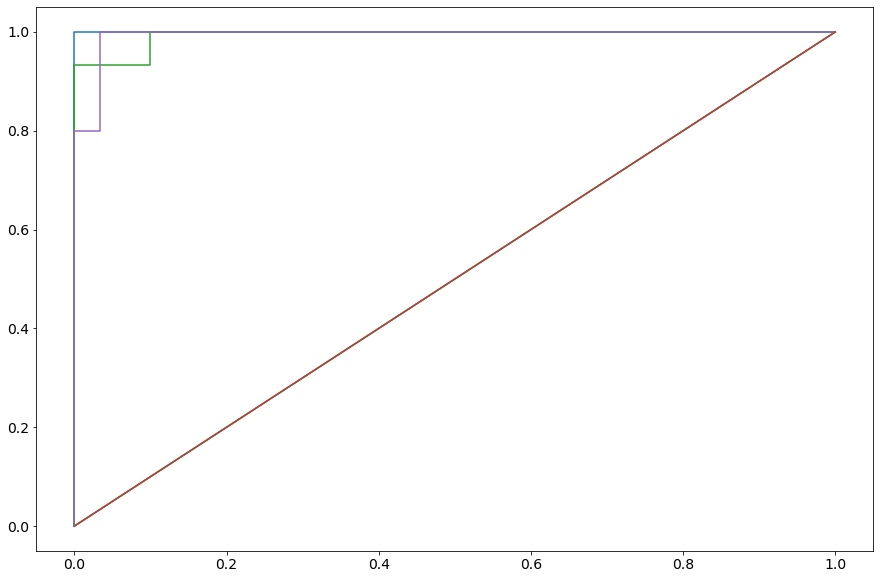

In [ ]:
from sklearn import metrics
ref=np.array([[0, 1], [0, 1]])
scores=logreg.predict_proba(X_test)
y=y_test
for i in range(X_test.shape[1]-1):
  fpr, tpr, thresholds = metrics.roc_curve(y, scores[:,i], pos_label=i)
  plt.plot (fpr,tpr)
  plt.plot(ref[0,:],ref[1,:])



Оцените работу модели при использовании StandartScaler;

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg.fit(X_train_scaled, y_train)

y_pred=logreg.predict(X_test_scaled)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)
scores = cross_val_score(
    logreg,     # Модель для оценки
    X_train_scaled,          # Данные для обучения
    y_train,          # Разметка для обучения
    cv=5,       # Количество фолдов
    scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Scores: [0.95213675 0.95213675 1.         1.         1.        ]
F1 (macro):  0.98 (+/-  0.05)


Исследуйте работу модели LogisticRegression с изменением аргумента (3 изменения / различных значения) iter - объяснить, что происходит при установке значения по-умолчанию (значение взять из справки);


In [ ]:
logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=100,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg=LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=50,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=1000,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



При использовании 3х различных значений (50, 100 (значение по умолчанию) и 1000) не было обнаружено изменений в значениях метрик.

Оцените работу модели при обучении на двух признаках (попробовать 2 пары признаков):
sepal length (cm) + sepal width (cm);
petal length (cm) + petal width (cm);

In [ ]:
X = df[[feature_names[0],feature_names[1]]]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.60      0.60      0.60        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



In [ ]:
X = df[[feature_names[2],feature_names[3]]]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Найдите лучшую пару признаков методом кросс-валидации на обучающих данных (перебрать все возможные пары);

In [ ]:
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        if (i<=j):
          continue 
        X = df[[feature_names[i],feature_names[j]]]
        y = target_idxs
        scores = cross_val_score(
             logreg,     # Модель для оценки
             X,          # Данные для обучения
             y,          # Разметка для обучения
             cv=5,       # Количество фолдов
             scoring='f1_macro'  # Желаемая метрика
        )
        print(f'Features:{feature_names[i],feature_names[j]}')
        print(f'Scores: {scores}')
        print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Features:('sepal width (cm)', 'sepal length (cm)')
Scores: [0.72222222 0.82949702 0.76608187 0.86666667 0.86807706]
F1 (macro):  0.81 (+/-  0.12)
Features:('petal length (cm)', 'sepal length (cm)')
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
Features:('petal length (cm)', 'sepal width (cm)')
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
Features:('petal width (cm)', 'sepal length (cm)')
Scores: [0.93333333 0.96658312 0.93265993 0.93265993 1.        ]
F1 (macro):  0.95 (+/-  0.05)
Features:('petal width (cm)', 'sepal width (cm)')
Scores: [0.93333333 0.96658312 0.89974937 0.93265993 0.96658312]
F1 (macro):  0.94 (+/-  0.05)
Features:('petal width (cm)', 'petal length (cm)')
Scores: [0.96658312 0.96658312 0.93265993 0.93333333 1.        ]
F1 (macro):  0.96 (+/-  0.05)


Освойте и изучите работу подхода классификации К ближайших соседей (KNN), продемонстрируйте работу и основную суть метода, сравните с показателями логистической регрессии;


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(
      knn,     # Модель для оценки
      X,          # Данные для обучения
      y,          # Разметка для обучения
      cv=5,       # Количество фолдов
      scoring='f1_macro'  # Желаемая метрика
)
print(f'Features:{feature_names[i],feature_names[j]}')
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Features:('petal width (cm)', 'petal width (cm)')
Scores: [0.96658312 0.96658312 0.93265993 0.96658312 1.        ]
F1 (macro):  0.97 (+/-  0.04)


Оцените влияние аргумента n_neighbors на работу модели KNN (7 различных значений); постройте график или таблицу основных показателей метрик от значения количества соседей;

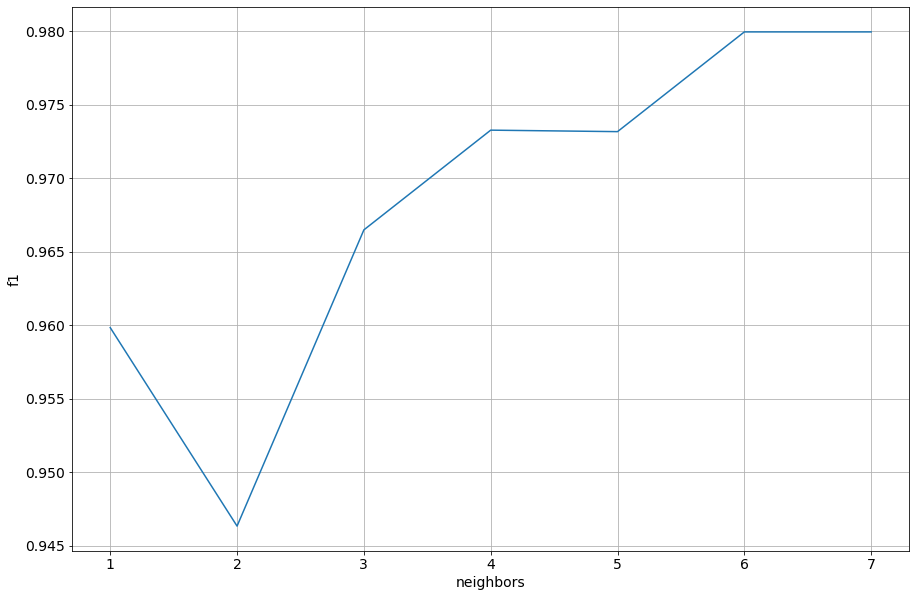

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scr=[]
for K_n in range(1,8):
  knn = KNeighborsClassifier(n_neighbors=K_n)
  scores = cross_val_score(
      knn,     # Модель для оценки
      X,          # Данные для обучения
      y,          # Разметка для обучения
      cv=5,       # Количество фолдов
      scoring='f1_macro'  # Желаемая метрика
  )
  scr.append(scores.mean()) 
plt.plot(range(1,8),scr)
plt.grid(True)
plt.ylabel('f1')
plt.xlabel('neighbors')
plt.show()

Как видно из полученного графика, наилучшим образом метод ближайших соседей покзывает себя при 6, 7 соседях, при этом метрика f1=0.98 Больше, чем при использовании логистической регрессии.


Отобразите плоскость решений при использовании двух признаков как лучшей модели логистической регрессии, так и лучшей модели KNN;

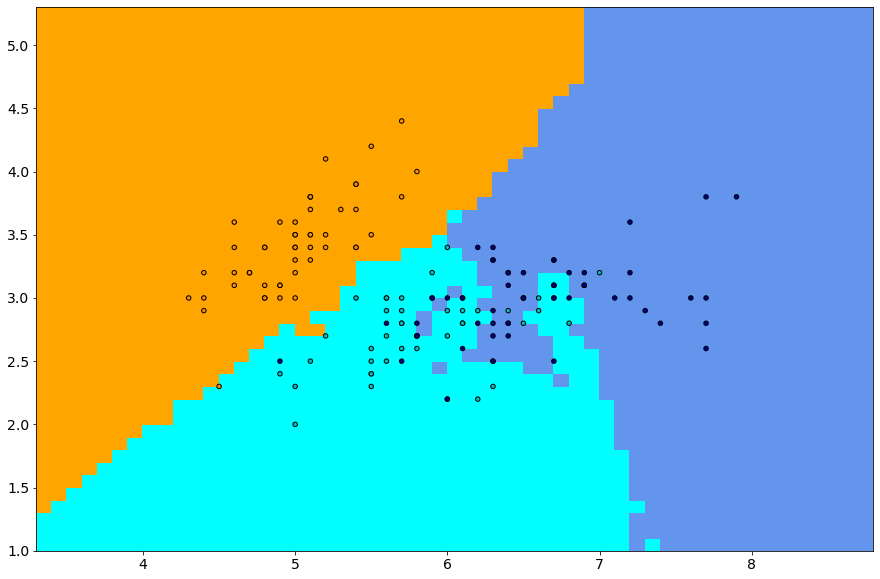

In [ ]:
from matplotlib.colors import ListedColormap
h = .02 
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
X_scaled=iris_data.data[:, 0:2]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled,y)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


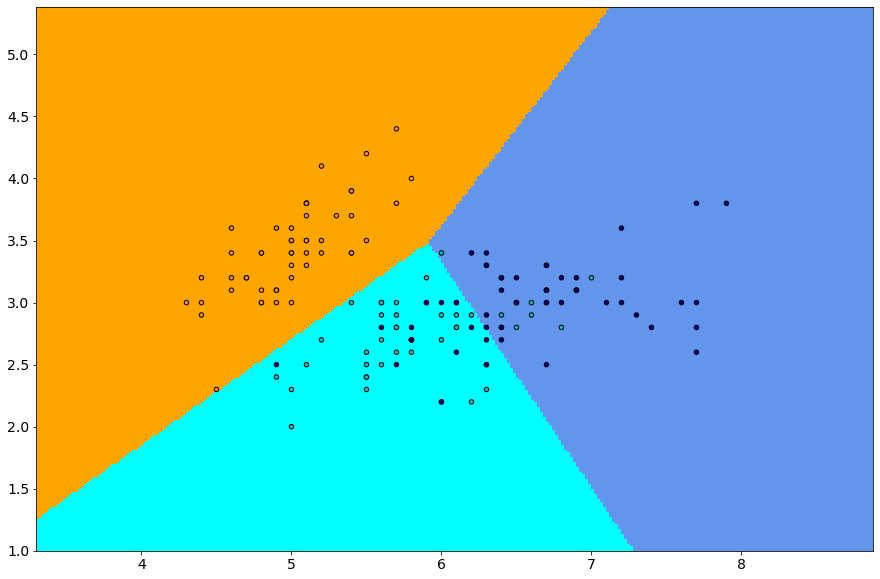

In [ ]:

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_scaled,y)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

(Для особо интересующихся) Почитайте про принцип работы метода SVM (Support Vector Machine), сравните линейный тип SVM модели с остальными.

In [ ]:
from sklearn.svm import LinearSVC
TRAIN_RATIO = 0.7

X = df[feature_names]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)
svm=LinearSVC(
    tol=1e-10,
    C=10,
    random_state=RANDOM_STATE,
    max_iter=5000
)
svm.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=5000,
          multi_class='ovr', penalty='l2', random_state=42, tol=1e-10,
          verbose=0)

In [ ]:
scores = cross_val_score(
  svm,     # Модель для оценки
  X,          # Данные для обучения
  y,          # Разметка для обучения
  cv=5,       # Количество фолдов
  scoring='f1_macro'  # Желаемая метрика
)
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [1.         0.96658312 0.96658312 0.93333333 1.        ]
F1 (macro):  0.97 (+/-  0.05)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

# Вопросы

1. Почему массив весов имеет размер 3х4, а массив смещений - 3 элемента в модели логистической регрессии?

Массив смещений размерностью совпадает с количеством классов

2. В чем различия методов усреднения статистики macro, micro и weighted?

macro - арифметическое среднее значение метрики для каждого класса без учета пропорции для каждой метрики в наборе данных, micro - вычисляется путем подсчета общего количества истинных положительных, ложных отрицательных значений и ложных срабатываний, weighted - возвращает среднее значение с учетом доли для каждой метрики в наборе данных.

3. Что означает support в отчете классификации?

Показывает количество фактических вхождений класса в указанный набор данных.

4. Продемонстрируйте расчет показателей recall и precision одного из классов по любой из CM



recall=0.9333333333333333; precision=0.875


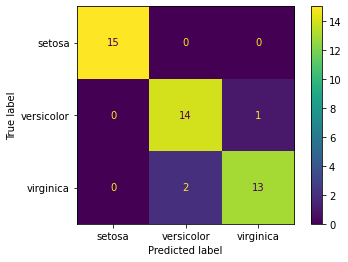

In [25]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)
precision=(disp.confusion_matrix[1,1]/np.sum(disp.confusion_matrix[:,1]))
recall=(disp.confusion_matrix[1,1]/np.sum(disp.confusion_matrix[1,:]))
print(f'recall={recall}; precision={precision}')

5. Что происходит при использовании аргумента stratify при разделении на выборки? Что будет, если не использовать данный аргумент?

Он указывается для того, чтобы определить в каких пропорциях будут классы при разделении данных на выборки. Если не использвоать, то будет произвольно.

6. В чем разницах подходов обучения модели линейной регрессии и логистичесой регрессии?

Логистическая регрессия решает задачи классификации (т.е. относит объект к тому или иному классу), в то время как линейная регрессия необходима для Линейная регрессия используется для предсказаний некоторого значения y основываясь на некотором множестве значений x. При обучении модели логистической регрессии мы стараемся найти такое разделение по признакам х, чтобы правильно присвоить класс данным. А в модели линейной регрессии мы стараемся повторить характер изменения зависимой переменной у в зависимости от значений признаков х (повторить характер движение точек на графике).

7. На основе чего работает метод KNN?

Объект присваивается тому классу, который является наиболее распространённым среди k ближайших соседей данного элемента, классы которых уже заведомо известны.

8. Как влияет количество соседей на работу модели?

Выбор параметра k противоречив: с одной стороны, увеличение его значения повышает достоверность классификации, но при этом границы между классами становятся менее четкими и уже не всегда получается верно определить принадлежность классу. Поэтому важно либо использовать какие-дибо методы для поиска k, либо просматривать несколько значений.

9. В чем отличие кросс-валидации от разделения на выборки обучения/валидации/теста? Для чего применяется выборка обучения? Валидации? А теста?

При кросс-валидации обучающая выбрка разделяется на К фолдов, далее в цикле происходит обучение на этих К-1 фолдах,а на оставшемся осуществляется оценка. Получается, что обучение и оценка происходят К раз.Тоесть на выходе мы уже будем иметь К оценок, что очень круто для анализа результатов. При обычном разделении на выборки просиходит единоразовое обучение модели на обучающей выборке, проверка работоспособности модели (выборка валидации) и оценка результатов (тестовая выборка).